In [30]:
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
import omnipath as op
import pandas as pd

First set the folder for input and output

In [31]:
data_folder = "../../../data/"

figures_folder = "../../Figures/Group3/"

sif_output = "../../sif_files/Group3/"

Selecting as resources just Signor

In [32]:
resources = Resources()

In [33]:
resources.import_signor_tsv(data_folder + "signor_db.tsv")

In [34]:
df = resources.interactions

In [35]:
# Remove rows where 'source' or 'target' starts with "CHEBI"
filtered_df = df[~(df['source'].str.startswith('CHEBI') | df['target'].str.startswith('CHEBI'))]

In [36]:
data = pd.read_csv(data_folder + "gene_per_subgroup_correlation_sorted_melt.csv")

In [37]:
data

,Gene,Group,Correlation
0,FAM65B,Group4,0.979231
1,ZFPM2,WNT,0.957692
2,ZFPM2,Group3,0.957692
3,PLCH1,SHH,0.955385
4,SIX6,Group4,0.955351
...,...,...,...
3138,CYTH3,Group4,0.486154
3139,DKK4,WNT,0.485445
3140,CSTF3,Group3,0.485385
3141,SNRPC,Group3,0.485385


In [38]:
# Sorting the plot_df by correlation in descending order and selecting the top N genes per group
top_n = 50  # Set the desired number of genes to display per group

top_genes_per_group = data.groupby('Group').apply(lambda x: x.nlargest(top_n, 'Correlation')).reset_index(drop=True)

top_genes_per_group

/tmp/ipykernel_23507/189381725.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_genes_per_group = data.groupby('Group').apply(lambda x: x.nlargest(top_n, 'Correlation')).reset_index(drop=True)


,Gene,Group,Correlation
0,ZFPM2,Group3,0.957692
1,FOXG1,Group3,0.947957
2,FSTL5,Group3,0.942308
3,PAPPA2,Group3,0.941538
4,IMPG2,Group3,0.941538
...,...,...,...
195,LRRC55,WNT,0.876923
196,SYT1,WNT,0.875385
197,SYT2,WNT,0.874615
198,PLXDC1,WNT,0.872308


In [39]:
group3_list = top_genes_per_group[top_genes_per_group["Group"] == "Group3"]["Gene"].reset_index(drop=True).to_list()

Selecting just Group 3 group

In [40]:
group3_list

['ZFPM2',
 'FOXG1',
 'FSTL5',
 'PAPPA2',
 'IMPG2',
 'OR2W3',
 'PTPRO',
 'TRIM58',
 'EYA2',
 'ANO2',
 'FAM174B',
 'RP11-127H5.1',
 'GUCY2D',
 'TAL2',
 'DOK6',
 'RD3',
 'PPP2R2B',
 'LDLRAD4',
 'KCNA5',
 'EYS',
 'SMARCD3',
 'AP000783.1',
 'LPPR5',
 'NPR3',
 'FCER2',
 'PROKR2',
 'FZD1',
 'ZFHX4',
 'DAB1',
 'SV2C',
 'TBR1',
 'FAM19A4',
 'GHR',
 'ARR3',
 'DCT',
 'NCKAP5',
 'SLITRK3',
 'CRX',
 'ZNF703',
 'LHX4',
 'LPPR4',
 'GRAMD1B',
 'TPRX2P',
 'C14orf23',
 'TSHZ3',
 'PLA2G4C',
 'KCNB2',
 'C2orf71',
 'C19orf77',
 'FAM89A']

# Creating a Network starting from All Omnipath interactions

In [41]:
group3_net = Network(group3_list, resources = filtered_df)

Error: node FSTL5 is not present in the resources database
Error: node PAPPA2 is not present in the resources database
Error: node IMPG2 is not present in the resources database
Error: node OR2W3 is not present in the resources database
Error: node PTPRO is not present in the resources database
Error: node EYA2 is not present in the resources database
Error: node ANO2 is not present in the resources database
Error: node FAM174B is not present in the resources database
Error: node RP11-127H5.1 is not present in the resources database
Error: node GUCY2D is not present in the resources database
Error: node RD3 is not present in the resources database
Error: node LDLRAD4 is not present in the resources database
Error: node EYS is not present in the resources database
Error: node AP000783.1 is not present in the resources database
Error: node LPPR5 is not present in the resources database
Error: node NPR3 is not present in the resources database
Error: node ZFHX4 is not present in the resou

Adding the node that were not found manually: HOXDB13 --> HOXD13, HOXDB --> HOXD9, Q8N9L1 --> ZIC4

In [42]:
group3_net.nodes

,Genesymbol,Uniprot,Type
0,ZFPM2,Q8WW38,NaN
1,FOXG1,P55316,NaN
2,TRIM58,Q8NG06,NaN
3,TAL2,Q16559,NaN
4,DOK6,Q6PKX4,NaN
5,PPP2R2B,Q00005,NaN
6,KCNA5,P22460,NaN
7,SMARCD3,Q6STE5,NaN
8,FCER2,P06734,NaN
9,PROKR2,Q8NFJ6,NaN


In [43]:
group3_net.complete_connection(maxlen=4, algorithm="dfs", only_signed=True, connect_with_bias=False, consensus=False)

In [44]:
group3_net.nodes

,Genesymbol,Uniprot,Type
0,ZFPM2,Q8WW38,NaN
1,FOXG1,P55316,NaN
2,TRIM58,Q8NG06,NaN
3,TAL2,Q16559,NaN
4,DOK6,Q6PKX4,NaN
...,...,...,...
62,PTGS2,P35354,NaN
63,EGR1,P18146,NaN
64,POU1F1,P28069,NaN
65,GH1,P01241,NaN


In [45]:
group3_net.edges

,source,target,Type,Effect,References
0,O75553,P46531,None,stimulation,22394407; 22394407
1,P46531,Q16665,None,stimulation,16256737; 16256737
2,Q16665,Q9UGL1,None,stimulation,32938217; 32938217
3,Q9UGL1,P55316,None,stimulation,12657635; 12657635
4,Q9UP38,P49715,None,inhibition,10937998; 10937998
...,...,...,...,...,...
161,Q04206,SIGNOR-C13,None,form complex,9450761
162,SIGNOR-C97,Q14469,None,stimulation,7566092
163,Q14469,SIGNOR-C97,None,inhibition,16682003
164,SIGNOR-C97,P23759,None,stimulation,22493066


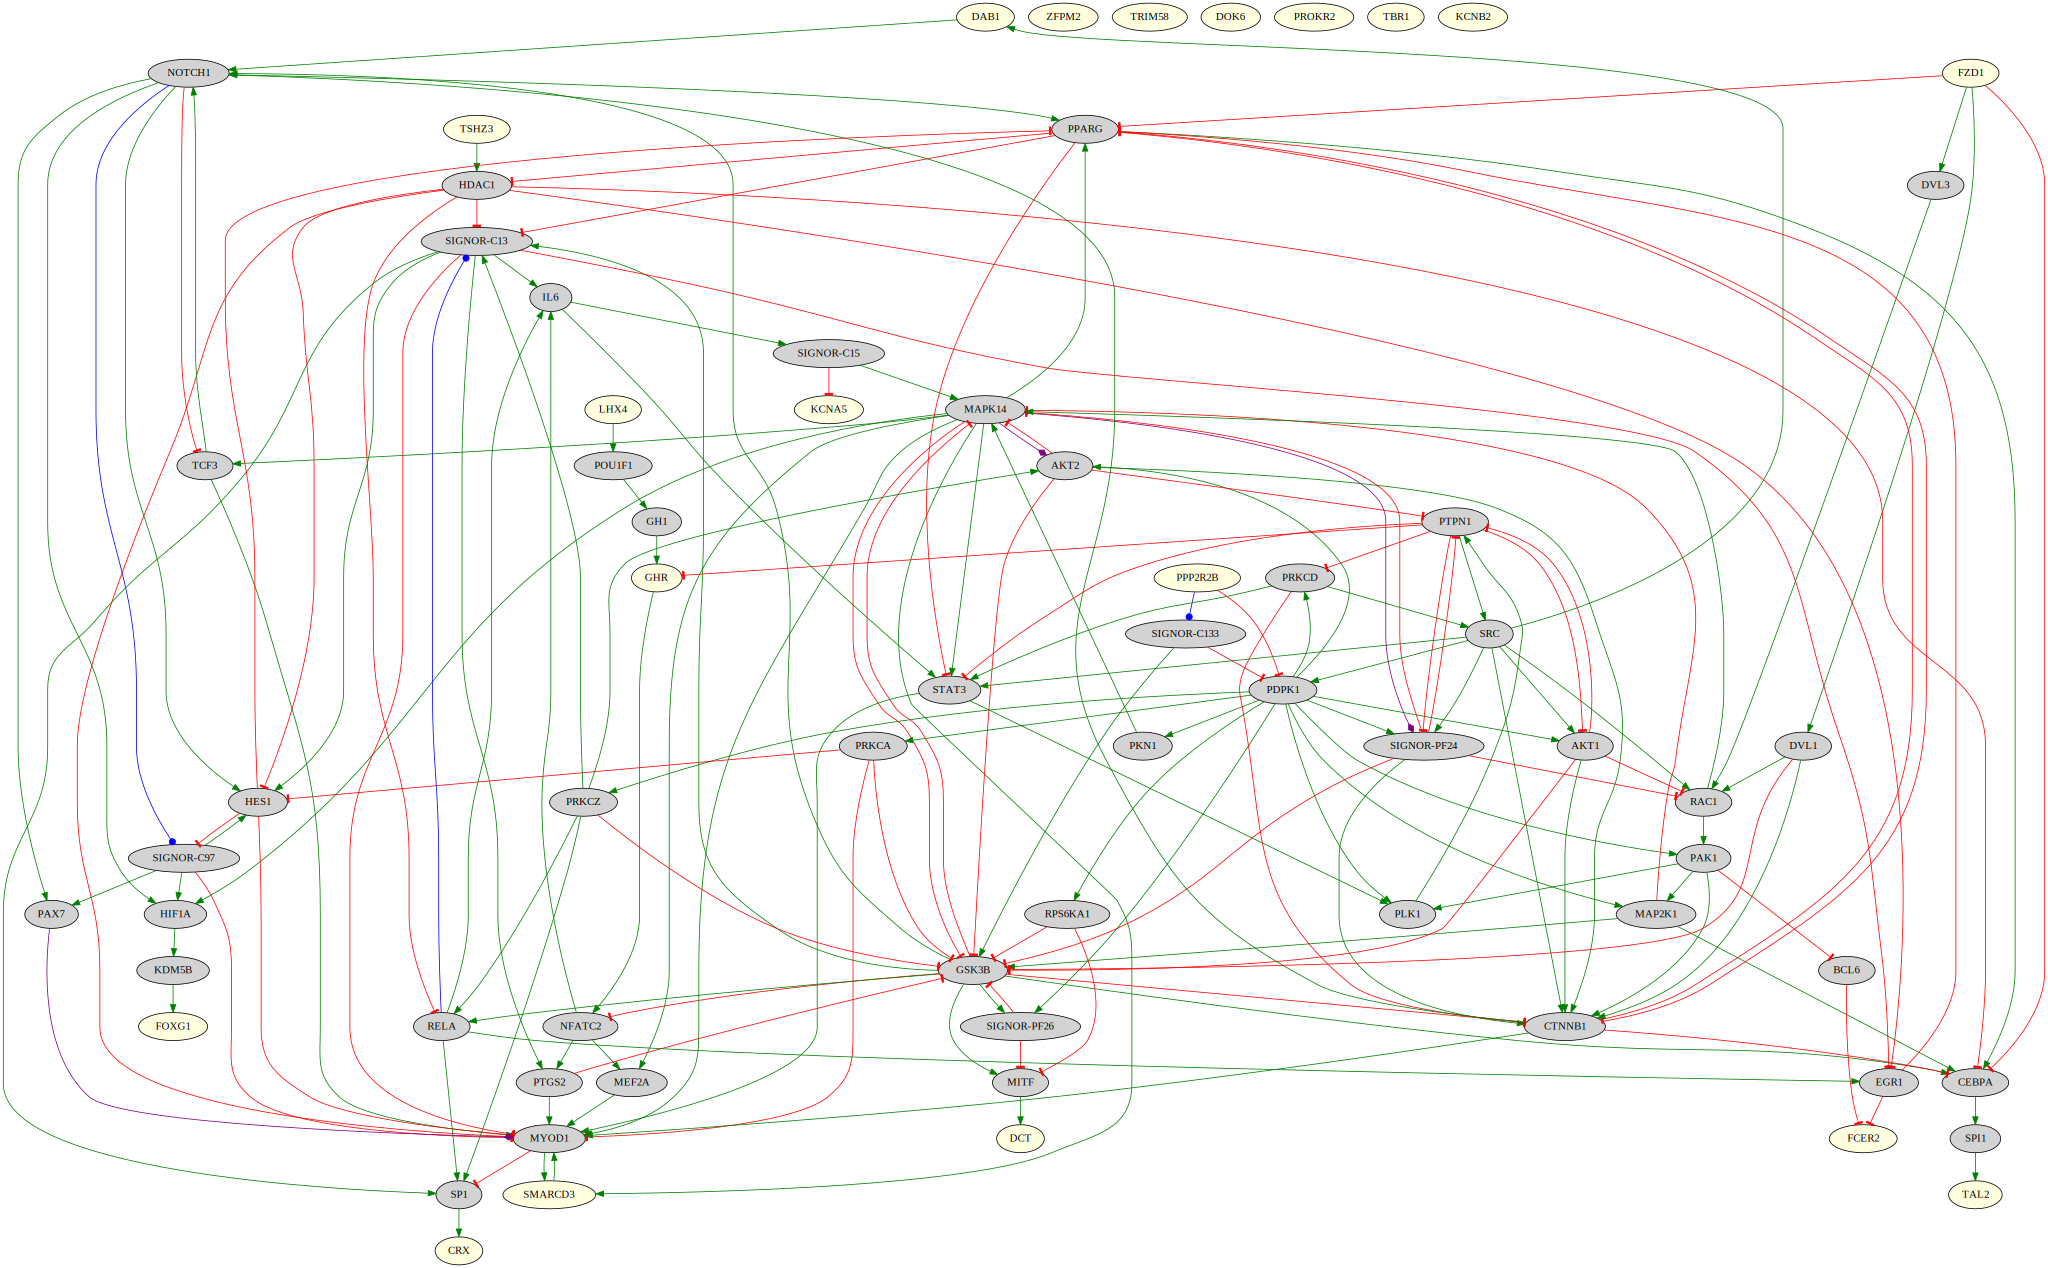

In [46]:
group3_visualizer = NetworkVisualizer(group3_net,color_by='effect', noi=True)
output = figures_folder + "Group3_signor_Lin"
group3_visualizer.render(output_file=output)

# Exporting Network in sif file

In [47]:
from neko._outputs.exports import Exports

In [48]:
for node in group3_net.nodes["Uniprot"]:
    if node not in group3_net.edges["source"].values and node not in group3_net.edges["target"].values:
        node = group3_net.nodes[ group3_net.nodes["Uniprot"] == node]["Genesymbol"].values
        print( node)
        group3_net.remove_node(node[0])

['ZFPM2']
['TRIM58']
['DOK6']
['PROKR2']
['TBR1']
['KCNB2']


In [49]:
export = Exports(group3_net)

In [50]:
export.export_sif(sif_output + "group3_signor_Lin.sif")